# Importing Libraries

---

*   **pandas, numpy & matplotlib** are used for dataframe/vector manipulatiion and visualisation.

*   The **KMeans** library from sklearn is used for clustering.
*   The **TruncatedSVD** library from sklearn is used for dimension reduction.
*   **pdist, jaccard, squareform** from scipy have been used to measure distances between various objects
---

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans 
from scipy.spatial.distance import pdist, jaccard
from scipy.spatial.distance import squareform
from sklearn.decomposition import TruncatedSVD

# Importing KOS data

---

The dataframe has the attributes:

      1 - docID: Unique identifier for each document in the dataset (approx 3500)
      2 - wordID: Unique identifier for each word in the vocabulary (approx 7000)
      3 - count: the number of times a particular word appears in the document
---

In [ ]:
df_k = pd.read_csv("docword.kos.txt",skiprows = [0, 1, 2], sep = " ", header = None)
df_k.columns = ["docID","wordID","count"]
df_k

,docID,wordID,count
0,1,61,2
1,1,76,1
2,1,89,1
3,1,211,1
4,1,296,1
...,...,...,...
353155,3430,6328,1
353156,3430,6644,1
353157,3430,6741,1
353158,3430,6799,1


In [ ]:
print(df_k.isnull().sum())

docID     0
wordID    0
count     0
dtype: int64


# Setting up a platform for clustering

---

* The dataframe imported is first transformed into a **docID x wordID** dimension matrix to keep track of what words are present in each doc.

* The new dataframe imported is transformed again into a **docID x docID** dimension matrix to keep track the Jaccard distance between each row of the earlier dataframe.

---

In [ ]:
df_km = df_k.pivot(index = "docID",columns = "wordID", values='count')
df_km = df_km.fillna(0)
df_km = pd.DataFrame(df_km)
df_km

wordID,1,2,3,4,5,6,7,8,9,10,...,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906
docID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
res = 1-pdist(df_km, 'jaccard')
squareform(res)
distance = pd.DataFrame(squareform(res), index=df_km.index, columns= df_km.index)
distance

docID,1,2,3,4,5,6,7,8,9,10,...,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430
docID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.026667,0.017699,0.026738,0.031390,0.015625,0.012270,0.022222,0.170370,0.022388,...,0.021739,0.018939,0.016722,0.014184,0.026667,0.021898,0.025424,0.018072,0.006369,0.017751
2,0.026667,0.000000,0.034286,0.020979,0.027174,0.024691,0.025641,0.011236,0.009009,0.084337,...,0.036765,0.018100,0.036585,0.066667,0.019417,0.032258,0.040541,0.024793,0.009174,0.008130
3,0.017699,0.034286,0.000000,0.028037,0.031496,0.006536,0.026316,0.031646,0.016393,0.012500,...,0.028708,0.679775,0.021605,0.012121,0.011299,0.018293,0.006757,0.010363,0.011111,0.010256
4,0.026738,0.020979,0.028037,0.000000,0.111675,0.016949,0.019355,0.008065,0.013333,0.024590,...,0.029070,0.031496,0.003425,0.023438,0.014286,0.007692,0.017857,0.012903,0.013986,0.012821
5,0.031390,0.027174,0.031496,0.111675,0.000000,0.018634,0.036458,0.024540,0.038043,0.017964,...,0.023256,0.041379,0.027692,0.011494,0.022099,0.017544,0.019737,0.035714,0.027027,0.025510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426,0.021898,0.032258,0.018293,0.007692,0.017544,0.075758,0.029412,0.027778,0.054348,0.040541,...,0.015748,0.024510,0.012346,0.051948,0.059524,0.000000,0.142857,0.019048,0.032609,0.028302
3427,0.025424,0.040541,0.006757,0.017857,0.019737,0.042553,0.072289,0.037037,0.013158,0.036364,...,0.028037,0.015873,0.008929,0.050000,0.086957,0.142857,0.000000,0.060976,0.026667,0.034091
3428,0.018072,0.024793,0.010363,0.012903,0.035714,0.010526,0.030303,0.019608,0.023810,0.009804,...,0.006579,0.008547,0.026217,0.038095,0.043478,0.019048,0.060976,0.000000,0.242424,0.007407


# Clustering

---

We follow the usual 3 step clustering process - 

* Find the optimal number of clusters, we use the **elbow method** for the same

* Initialising K-Means with optimum number Of clusters which is found by observing the elbow graph

* Reduce the dimension and visualising the clusters

---

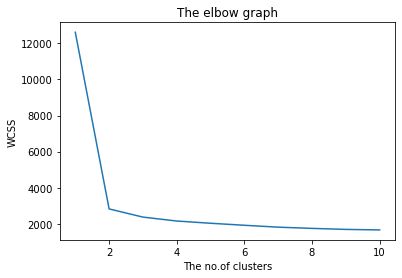

In [ ]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(distance)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia)
plt.title("The elbow graph")
plt.xlabel("The no.of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
model = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=10)
model.fit(distance)
pred = model.predict(distance)

In [ ]:
MC = model.cluster_centers_  
MC

array([[0.01610598, 0.01457638, 0.01529662, ..., 0.01518573, 0.01662632,
        0.02054304],
       [0.01700291, 0.00948266, 0.38450495, ..., 0.01258929, 0.00909611,
        0.01273988]])

In [ ]:
svd = TruncatedSVD(n_components=2)
svd.fit(distance)

matrix_svd = svd.transform(distance)
centers = svd.transform(model.cluster_centers_)

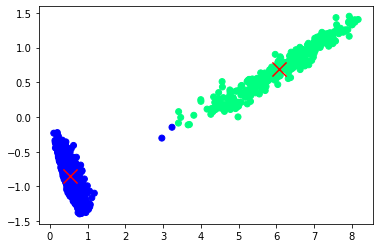

In [ ]:
plt.scatter(matrix_svd[:,0],matrix_svd[:,1],c=pred,cmap = 'winter')
plt.scatter(centers[:,0],centers[:,1],c = 'r',marker = 'x',s = 200)

# Importing NIPS data

---

The dataframe has the attributes:

      1 - docID: Unique identifier for each document in the dataset (approx 1500)
      2 - wordID: Unique identifier for each word in the vocabulary (approx 12000)
      3 - count: the number of times a particular word appears in the document
---

In [ ]:
df_n = pd.read_csv("docword.nips.txt",skiprows = [0, 1, 2], sep = " ", header = None)
df_n.columns = ["docID","wordID","count"]
df_n

,docID,wordID,count
0,1,2,1
1,1,39,1
2,1,42,3
3,1,77,1
4,1,95,1
...,...,...,...
746311,1500,12382,1
746312,1500,12388,3
746313,1500,12390,1
746314,1500,12393,1


In [ ]:
print(df_n.isnull().sum())

docID     0
wordID    0
count     0
dtype: int64


# Setting up a platform for clustering

---

* The dataframe imported is first transformed into a **docID x wordID** dimension matrix to keep track of what words are present in each doc.

* The new dataframe imported is transformed again into a **docID x docID** dimension matrix to keep track the Jaccard distance between each row of the earlier dataframe.

---

In [ ]:
df_nm = df_n.pivot(index = "docID",columns = "wordID", values='count')
df_nm = df_nm.fillna(0)
df_nm = pd.DataFrame(df_nm)
df_nm

wordID,1,2,3,4,5,6,7,8,9,10,...,12410,12411,12412,12413,12414,12415,12416,12417,12418,12419
docID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
res = 1-pdist(df_nm, 'jaccard')
squareform(res)
distance = pd.DataFrame(squareform(res), index=df_nm.index, columns= df_nm.index)
distance

docID,1,2,3,4,5,6,7,8,9,10,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
docID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.061422,0.047619,0.051818,0.051227,0.036088,0.047045,0.043860,0.056243,0.056818,...,0.041203,0.048705,0.045631,0.042529,0.049847,0.042575,0.050777,0.046771,0.038922,0.002347
2,0.061422,0.000000,0.045596,0.052585,0.067941,0.037373,0.044601,0.068922,0.064516,0.047236,...,0.053333,0.050672,0.050339,0.044893,0.044776,0.046465,0.062181,0.051592,0.041016,0.004614
3,0.047619,0.045596,0.000000,0.047368,0.036623,0.029083,0.052083,0.041112,0.045752,0.050388,...,0.050866,0.056795,0.054028,0.042841,0.045276,0.049281,0.052632,0.050866,0.063809,0.000000
4,0.051818,0.052585,0.047368,0.000000,0.056604,0.037175,0.062749,0.039370,0.049120,0.058179,...,0.044790,0.063700,0.051155,0.046756,0.061207,0.063213,0.047578,0.039711,0.042893,0.004673
5,0.051227,0.067941,0.036623,0.056604,0.000000,0.044693,0.049596,0.053269,0.060201,0.062130,...,0.046841,0.053427,0.063768,0.043084,0.059524,0.061678,0.063895,0.050921,0.054741,0.003352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0.042575,0.046465,0.049281,0.063213,0.061678,0.038085,0.046538,0.033410,0.048168,0.046377,...,0.056831,0.058263,0.053283,0.041896,0.054054,0.000000,0.058223,0.049730,0.063072,0.002240
1497,0.050777,0.062181,0.052632,0.047578,0.063895,0.040570,0.044994,0.045614,0.041929,0.055286,...,0.052345,0.065421,0.071569,0.047826,0.075258,0.058223,0.000000,0.060475,0.063444,0.010067
1498,0.046771,0.051592,0.050866,0.039711,0.050921,0.042453,0.047503,0.041344,0.040632,0.055901,...,0.070707,0.046809,0.049030,0.049822,0.042194,0.049730,0.060475,0.000000,0.049735,0.006242


# Clustering

---

We follow the usual 3 step clustering process - 

* Find the optimal number of clusters, we use the **elbow method** for the same

* Initialising K-Means with optimum number Of clusters which is found by observing the elbow graph

* Reduce the dimension and visualising the clusters

---

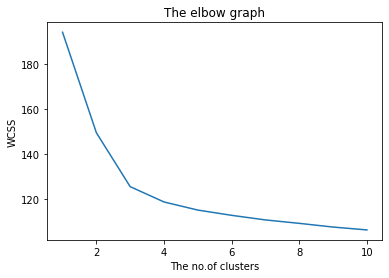

In [ ]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(distance)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11,1),inertia)
plt.title("The elbow graph")
plt.xlabel("The no.of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=1000, n_init=10)
model.fit(distance)
pred = model.predict(distance)

In [ ]:
model.cluster_centers_  

array([[0.04048913, 0.04506762, 0.03893867, ..., 0.03636988, 0.03695159,
        0.00303539],
       [0.00353487, 0.00514083, 0.00391955, ..., 0.00357666, 0.00421268,
        0.0613128 ],
       [0.04818311, 0.05221642, 0.04643938, ..., 0.04633079, 0.04724243,
        0.00348003]])

In [ ]:
svd = TruncatedSVD(n_components=2)
svd.fit(distance)

matrix_svd = svd.transform(distance)
centers = svd.transform(model.cluster_centers_)

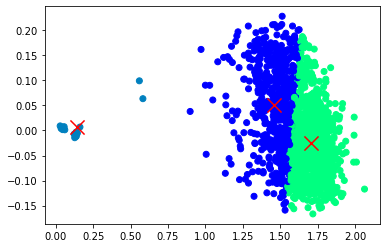

In [ ]:
plt.scatter(matrix_svd[:,0],matrix_svd[:,1],c=pred,cmap = 'winter')
plt.scatter(centers[:,0],centers[:,1],c = 'r',marker = 'x',s = 200)